# Part I: Fundamentals of NLP

Natural Language Processing  

Author: D.Thébault

Referenced used:

- https://nlpdemystified.org

- https://www.khoury.northeastern.edu/home/vip/teach/DMcourse/5_topicmodel_summ/Lad-Gibbs-lecture032321.pdf  


**In this jupyter notebook we will describe what is Topic modeling, Latent Dirichlet Allocation and Collapsed Gibbs Sampling.**

## **Topic Modelling**

**Definition of topic modelling**:  

Automatically finding topics in documents using Latent Dirichlet Allocation.  

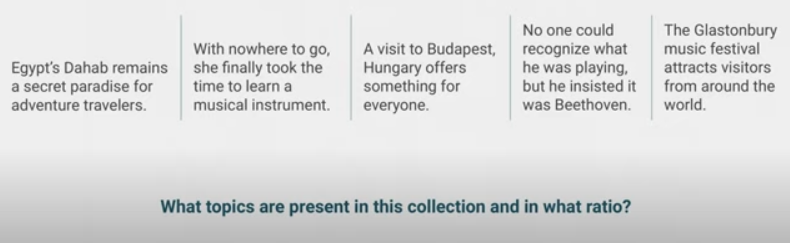

In [ ]:
from IPython import display
display.Image(r"./png/Topic_modelling_1.png")

**Exemple**:  

Topic A: Travel  
Topic B: Music  

Try to find out at which topic the following documents are related to.  

- "Egypt's Dahab remains a secret paradise for adventure travelers."  => Topic A: 100%
- "The Glastonbury music festival attracts visitors from around the world." => Topic A: 60% Topic B: 40%

**Topic modelling makes two asumptions:**  

1. **Every document is a mix of topics**

2. **Every topic is a mix of words**

## Latent Dirichlet Allocation

Latent Dirichlet Allocation (LDA) (Blei et al., 2003) is a probabilistic model which organizes and summarizes  
large corpora of text documents by automatically discovering the semantic themes, or topics, hidden within the data.  

LDA asumptions are that:

- Every document is a mix of topics  

- Every topic is a mix of words (the order of the words does not matter)

[LDA](https://www.khoury.northeastern.edu/home/vip/teach/DMcourse/5_topicmodel_summ/Lad-Gibbs-lecture032321.pdf)

The algorithm:  

From a Theorical and Practical Implementation Tutorial on Topic Modelling and Gibbs Sampling (2003) William M.Darling.  

**The generative process for a document collection D under the LDA model is as follows**:

1. For $k = 1, \ldots ,K$  
    - $\phi^{(k)} \sim Dirichlet(\beta) \; \Leftarrow$ word distribution for the topic $k$  

2. For each $d = 1, \ldots, D:$  
    - $\theta_d \sim Dirichlet(\alpha) \; \Leftarrow$ topic distribution for the document $d$  
    - For each $w_i \in d:$  
        i. $z_i \sim Discrete(\theta_d)\; \Leftarrow$ we sample a topic which the word should be in (maxim. proba)     
        ii. $w_i \sim Discrete(\phi^{(z_i)}) \Leftarrow$ we sample a word which comes from the topic $z_i$  

The hyperparameters $\alpha$ and $\beta$ are known as the Dirichlet priors. They are the hypothesis.  

They regularize the process avoiding the topics to become too specific or too general.  

- $\alpha$ controls the concentration of topics in each document.  
- $\beta$ controls the concentration of words in each topic.  

The algorithm converges through a stable distribution of the topics.  

If we have 3 topics representing by a triangle where each sommet is a topic,  
words will be distributed by the Dirichlet distribution inside this triangle as follow:  
- $\alpha < 1$ will distribute the words close to the sommets
- $\alpha = 1$ will distribute the words uniformly
- $\alpha > 1$ will concentrate the words at the center of the triangle.

Note: 

In the NLP_Part_1_6.ipynb we will build a LDA machine

**Total distribution of the LDA model**  

In the LDA model, the <u>joint probability</u> of toptics (z), words (w), per-document topic distribution $\theta$,  
per-documnent words distribution $\phi$ and the Dirichlet parameters $\alpha$, $\beta$ is given by: 

$$p(z, w, \phi, \theta \mid \alpha, \beta) = p(\theta | \alpha, \beta) \; . \; p(\phi \mid w, z, \theta, \alpha, \beta ) \; . \; p(z \mid w, \phi, \theta, \alpha, \beta) \; . \; p(w \mid z, \phi, \theta, \alpha, \beta)$$

Knowing tha $\theta$ only depends on $\alpha$, $\phi$ only depends on $\beta$, $z$ only depends on $\theta$  
and $w$ depends only depends on $z$ and $\phi$, we can simplify the equation as follow:  

Total distribution of the LDA model:

**$$p(z, w, \phi, \theta \mid \alpha, \beta) = p(\theta \mid \alpha) \; . \; p(\phi \mid \beta ) \; . \; p(z \mid \theta) \; . \; p(w  \mid  z, \phi)$$**

$$p(z, w, \phi , \theta \mid \alpha, \beta) = 
\overset{D}{\underset{d=1}{\prod}} p(\theta_d \mid \alpha)  \; . \; 
\overset{K}{\underset{k=1}{\prod}} p(\phi_k \mid \beta)  \; . \; 
\overset{D}{\underset{d=1}{\prod}}\overset{N_d}{\underset{i=1}{\prod}} p(z_{d,i} \mid \theta_d)  \; . \; 
\overset{D}{\underset{d=1}{\prod}}\overset{N_d}{\underset{i=1}{\prod}}p(w_{d,i} \mid z_{d,i}, \phi_{z_{d,i}})$$

As we can see, LDA models are typically trained using Bayesian inference techniques using:  

- $p(\phi_k \mid \beta)$: 
probability of the word distribution $\phi_k$ for topic $k$ given the parameter $\beta$. Modelized by a Dirichlet $(\beta)$
- $p(\theta_d \mid \alpha)$: 
probability of the topic distribution $\theta_d$ in document $j$ given the parameter $\alpha$. Modelized by a Dirichlet $(\alpha)$
- $p(z_{d,i} \mid \theta_d)$: 
probability of assigning topic $k$ to word $i$ in document $d$ knowing the topic distribution $\theta_d$  
- $p(w_{d,i} \mid \phi_{z_{d,t}})$: 
probability of a word $i$ being in document $d$ and belonging to topic $k$ knowing the word distribution $\phi_{z_{d,k}}$.

The **goal of the LDA model** is to infer (discover) the latent variables (topics $z$, topic-distribution $\theta$, word-distribution $\phi$) from the observed words.  
In other words, the goal is to understand the underlying structure of the documents in term of topics.


Given a set of observed training documents $w$, the goal of Bayesian inference is to “invert” the assumed generative process  
of the model,  going “backwards” from the data to recover the parameters, by inferring the posterior distribution over them.  
In the case of LDA, the posterior distribution over parameters and latent variables is given by Bayes’ rule as   

$$p(z, \phi, \theta \mid w, \alpha, \beta) = p(w \mid \phi, \theta, z )\; . \;p(\phi, \theta, z \mid \alpha, \beta)\; . \;p(w \mid  \alpha, \beta)$$

Note:  

$p(z, \phi, \theta \mid w, \alpha, \beta) = \dfrac{p(z, w, \phi, \theta \mid \alpha, \beta)}{p(w  \mid  \alpha, \beta)}$

The integration of $p(w  \; | \;  \alpha, \beta) = \int \int \underset{z}{\sum} \; p(z, w, \phi , \theta \; | \; \alpha, \beta)d\phi d\theta$ is generally analytically intractable.  

Techniques such as Monte-Carlo or variational inference allow to approximate $p(w  \mid  \alpha, \beta)$  

In this notebook we will focus on Collapsed Gibbs Sampling which is a Monte-Carlo Markov Chain (MCMC) algorithm  
that allows to estimate the posterior distribution of $p(z | w, \alpha, \beta)$  
i.e. to understand how subjects are assigned to words in the documents.  

Note:  

In the notebook NLP_1_7.ipynb we will implement the CGS for LDA modelling.


To obtain the posterior conditional distribution of $z$ topic assignations, we marginalize (1) on $\phi$ and $\theta$.

$$p(z \mid w, \alpha, \beta) = 
\int \int p(\theta \mid \alpha) \; . \; 
p(\phi \mid \beta ) \; . \; 
p(z \mid \theta) \; . \; 
p(w \mid  z, \phi) \; d\phi \; d\theta$$

Using the Dirichlet distributions properties and the multinomials properties,  
we obtain the conditional posterior assignation of topics $z$ to a word $w_{dn}$ and a document $d$:

$$p(z_{dn}=k \mid w, \alpha, \beta) 
\propto 
\dfrac{n_{dk}^{-dn} + \alpha_k}{\underset{k'}{\sum}(n_{dk'}^{-dn} + \alpha_{k'})}.
\dfrac{n_{kw_{dn}}^{-dn} + \beta_{w_{dn}}}{\underset{w'}{\sum}(n_{kw'}^{-dn} + \beta_{w'})}$$

The goal is to train our LDA machine to fit our latent variables $\alpha$ and $\beta$ to generate a corpus as close to ours as possible.

We will have then the corpus adapted:
- per document topic distributions $\theta$ and 
- per topic word distribution $\phi$.  

We use the machine to reverse engineer our corpus.

## Apendices

### Dirichlet and multinomial properties


As the Dirichlet distribution for $\theta$ is conjugated to the multinomial distribution for $z$.  
This means we can integrate over $\theta$ using the conjugacy property:  

The Dirichlet distribution for $\theta$ is given by:

$$p(\theta \mid \alpha) = 
\dfrac{1}{\Beta(\alpha_{k})} 
\prod_{k} \theta_{k}^{\alpha_{k} - 1}$$


With $\text{Beta}(\alpha_{k})$ written $\Beta(\alpha_{k}) = 
\frac{\Gamma(\sum_{k} \alpha_{k})}{\prod_{k} \Gamma(\alpha_{k})}$

The multinomial distribution for $z$ is given by:

$$p(z \mid \theta) = \prod_{d} \prod_{n} \theta_{z_{dn}}$$

Integration over $\theta$:

$$\int p(\theta \mid \alpha) \cdot p(z \mid \theta) \, d\theta = 
\frac{\prod_{k} \Gamma(\alpha_{k})}{\Gamma(\sum_{k} \alpha_{k})} 
\cdot 
\frac{\Gamma(\sum_{k} (n_{dk} + \alpha_{k}))}{\prod_{k} \Gamma(n_{dk} + \alpha_{k})}$$


Similarly, the Dirichlet distribution for $\phi$ is conjugated to the multinomial distribution for $q$.  
The Dirichlet distribution for $\phi$ is given by:

$$p(\phi \mid \beta) = 
\frac{\prod_{w} \Gamma(\beta_{w})}{\Gamma(\sum_{w} \beta_{w})} 
\prod_{w} \phi_{w}^{\beta_{w} - 1}$$


The multinomial distribution for $\phi$ is given by:

$$p(w \mid z, \phi) = \prod_{d} \prod_{n} \phi_{w_{dn}, z_{dn}}$$

To integrate over $\phi$, we use the conjugacy property between the Dirichlet distribution and the multinomial distribution.  
The posterior distribution of $\phi$ after observing the words $w$ is also a Dirichlet distribution.

$$p(\phi \mid w, z, \beta) = 
\frac{\prod_{w} \Gamma(n_{kw} + \beta_{w})}{\Gamma(\sum_{w} (n_{kw} + \beta_{w}))} \prod_{w} \phi_{w}^{n_{kw} + \beta_{w} - 1}$$

With $n_{kw}$ the number of times the word $w$ is assigned to the topic $k$.

The probability to assign a word $w_{dn}$ to a topic $k$ is given by:

$$p(w_{dn} = w \mid z_{dn} = k, \phi) = \phi_{w,k}$$

Integrating over $\phi$, we obtain:

$$p(w_{dn} = w \mid z_{dn} = k, \beta) = \int p(w_{dn} = w \mid z_{dn} = k, \phi) \cdot p(\phi \mid \beta) \, d\phi$$

Using the conjugacy properties, we have the probability to assign the word $w_{dn}$ to the topic $k$ is given by:

$$p(w_{dn} = w \mid z_{dn} = k, \beta) = \frac{n_{kw} + \beta_{w}}{\sum_{w'} (n_{kw'} + \beta_{w'})}$$

To obtain the probability of assigning the word $w_{dn}$ to topic $k$ we need to integrate over $\phi$.  
The probability of assigning the word $w_{dn}$ to topic $k$ is given by:

$$\int p(\phi \mid \beta) \cdot p(w \mid z, \phi) \, d\phi = 
\frac{\prod_{w} \Gamma(\beta_{w})}{\Gamma(\sum_{w} \beta_{w})} 
\cdot 
\frac{\Gamma(\sum_{w} (n_{kw} + \beta_{w}))}{\prod_{w} \Gamma(n_{kw} + \beta_{w})}$$

With $n_{kw}$ the number of times the word $w$ is assigned to the topic $k$.

### The chain rule  

$p(A,B,C,D) = p(A) . p(B \mid A) . p(C \mid A,B) . p(D \mid A,B,C)$  

Demonstration:  

$p(A,B,C,D) = p(B,C,D \mid A)p(A)$  

and $p(B,C,D \mid A)=p(C,D \mid A,B).p(B \mid A)$  

and $p(C,D \mid A,B)=p(D \mid A,B,C).p(C \mid A,B)$